# Phoenix modeling residuals w/grouped features

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [3]:
phoenix_zip = ['85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173']

In [4]:
%load_ext google.cloud.bigquery

In [5]:
%%bigquery acs_phoenix1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 260/260 [00:01<00:00, 139.23rows/s]


In [6]:
%%bigquery acs_phoenix2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 260/260 [00:02<00:00, 129.97rows/s]


In [7]:
%%bigquery acs_phoenix3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');


Downloading: 100%|██████████| 130/130 [00:01<00:00, 75.60rows/s]


In [8]:
%%bigquery acs_phoenix4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.76rows/s]


In [9]:
%%bigquery acs_phoenix5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')
;

Downloading: 100%|██████████| 130/130 [00:01<00:00, 78.72rows/s]


In [10]:
%%bigquery acs_phoenix6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173')

Downloading: 100%|██████████| 130/130 [00:01<00:00, 73.53rows/s]


In [11]:
acs_cols1=acs_phoenix1.columns
acs_cols2=acs_phoenix2.columns
acs_cols3=acs_phoenix3.columns
acs_cols4=acs_phoenix4.columns
acs_cols5=acs_phoenix5.columns
acs_cols6=acs_phoenix6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [12]:
dfs=[acs_phoenix1[common_columns],
    acs_phoenix2[common_columns],
    acs_phoenix3[common_columns],
    acs_phoenix4[common_columns],
    acs_phoenix5[common_columns],
    acs_phoenix6[common_columns]]

acs_all_phoenix=pd.concat(dfs)
acs_all_phoenix.shape

(1040, 234)

In [13]:
acs_all_phoenix['do_date'] = acs_all_phoenix['do_date'].astype(str)
acs_all_phoenix['year'] = np.where(acs_all_phoenix['do_date'] =='20072011', '2011',
                                  np.where(acs_all_phoenix['do_date'] =='20082012','2012',
                                  np.where(acs_all_phoenix['do_date'] =='20092013','2013',
                                  np.where(acs_all_phoenix['do_date'] =='20102014','2014',
                                  np.where(acs_all_phoenix['do_date'] =='20112015','2015',
                                  np.where(acs_all_phoenix['do_date'] =='20122016','2016',
                                  np.where(acs_all_phoenix['do_date'] =='20132017','2017',
                                  np.where(acs_all_phoenix['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [14]:
acs_all_phoenix['year'] = acs_all_phoenix['year'].astype('string')


In [15]:
acs_all_phoenix.head()

,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,pop_determined_poverty_status,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,pop_5_years_over,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,hispanic_pop,income_20000_24999,speak_spanish_at_home_low_english,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,income_per_capita,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,total_pop,nonfamily_households,households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,femal

In [16]:
missing_zip = [el for el in phoenix_zip if el not in list(acs_all_phoenix['geo_id'])]
missing_zip

['85378']

#### Grouping female age columns together

In [17]:
female_under_18 = acs_all_phoenix.female_under_5 + acs_all_phoenix.female_5_to_9 + acs_all_phoenix.female_10_to_14 + acs_all_phoenix.female_15_to_17 + acs_all_phoenix.female_18_to_19
female_under_60 = acs_all_phoenix.female_20 + acs_all_phoenix.female_21 + acs_all_phoenix.female_22_to_24 + acs_all_phoenix.female_25_to_29 + acs_all_phoenix.female_30_to_34 + acs_all_phoenix.female_35_to_39 + acs_all_phoenix.female_40_to_44 + acs_all_phoenix.female_45_to_49 + acs_all_phoenix.female_50_to_54 + acs_all_phoenix.female_55_to_59 
female_over_60 = acs_all_phoenix.female_60_to_61 + acs_all_phoenix.female_62_to_64 + acs_all_phoenix.female_65_to_66 + acs_all_phoenix.female_67_to_69 + acs_all_phoenix.female_70_to_74 + acs_all_phoenix.female_75_to_79 + acs_all_phoenix.female_80_to_84 + acs_all_phoenix.female_85_and_over

In [18]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [19]:
male_under_18 = acs_all_phoenix.male_under_5 + acs_all_phoenix.male_5_to_9 + acs_all_phoenix.male_10_to_14 + acs_all_phoenix.male_15_to_17 + acs_all_phoenix.male_18_to_19
male_under_60 = acs_all_phoenix.male_20 + acs_all_phoenix.male_21 + acs_all_phoenix.male_22_to_24 + acs_all_phoenix.male_25_to_29 + acs_all_phoenix.male_30_to_34 + acs_all_phoenix.male_35_to_39 + acs_all_phoenix.male_40_to_44 + acs_all_phoenix.male_45_to_49 + acs_all_phoenix.male_50_to_54 + acs_all_phoenix.male_55_to_59 
male_over_60 =  acs_all_phoenix.male_65_to_66 + acs_all_phoenix.male_67_to_69 + acs_all_phoenix.male_70_to_74 + acs_all_phoenix.male_75_to_79 + acs_all_phoenix.male_80_to_84 + acs_all_phoenix.male_85_and_over

In [20]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [21]:
under10 = acs_all_phoenix.rent_under_10_percent
tento50 = acs_all_phoenix.rent_40_to_50_percent + acs_all_phoenix.rent_35_to_40_percent + acs_all_phoenix.rent_30_to_35_percent+ acs_all_phoenix.rent_25_to_30_percent + acs_all_phoenix.rent_20_to_25_percent + acs_all_phoenix.rent_15_to_20_percent + acs_all_phoenix.rent_10_to_15_percent
over50 = acs_all_phoenix.rent_over_50_percent
uncomputed = acs_all_phoenix.rent_burden_not_computed

In [22]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [23]:
small_dwellings = acs_all_phoenix.dwellings_1_units_attached + acs_all_phoenix.dwellings_1_units_detached + acs_all_phoenix.dwellings_2_units + acs_all_phoenix.dwellings_3_to_4_units + acs_all_phoenix.dwellings_5_to_9_units
large_dwellings = acs_all_phoenix.dwellings_10_to_19_units + acs_all_phoenix.dwellings_20_to_49_units + acs_all_phoenix.dwellings_50_or_more_units

In [24]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [25]:
commute_less_than_30 =  acs_all_phoenix.commute_less_10_mins + acs_all_phoenix.commute_10_14_mins + acs_all_phoenix.commute_15_19_mins + acs_all_phoenix.commute_20_24_mins + acs_all_phoenix.commute_25_29_mins
commute_less_than_60 = acs_all_phoenix.commute_30_34_mins + acs_all_phoenix.commute_35_44_mins +  acs_all_phoenix.commute_45_59_mins
commute_over_60 =  acs_all_phoenix.commute_60_more_mins 

In [26]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [27]:
income_less_than_60000 = acs_all_phoenix.income_less_10000 + acs_all_phoenix.income_10000_14999 + acs_all_phoenix.income_15000_19999 + acs_all_phoenix.income_20000_24999 + acs_all_phoenix.income_25000_29999 + acs_all_phoenix.income_30000_34999 + acs_all_phoenix.income_35000_39999 + acs_all_phoenix.income_40000_44999 + acs_all_phoenix.income_45000_49999 + acs_all_phoenix.income_50000_59999
income_less_than_125000 = acs_all_phoenix.income_60000_74999 + acs_all_phoenix.income_75000_99999 + acs_all_phoenix.income_100000_124999
income_over_125000 = acs_all_phoenix.income_125000_149999 + acs_all_phoenix.income_150000_199999 + acs_all_phoenix.income_200000_or_more

In [28]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [29]:
employed_creative = acs_all_phoenix.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_phoenix.employed_education_health_social + acs_all_phoenix.employed_finance_insurance_real_estate + acs_all_phoenix.employed_information + acs_all_phoenix.employed_science_management_admin_waste
employed_skill = acs_all_phoenix.employed_manufacturing + acs_all_phoenix.employed_construction + acs_all_phoenix.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_phoenix.employed_retail_trade + acs_all_phoenix.employed_other_services_not_public_admin + acs_all_phoenix.employed_public_administration + acs_all_phoenix.employed_transportation_warehousing_utilities + acs_all_phoenix.employed_wholesale_trade

#### Choosing family type columns

In [30]:
two_parent_hh = acs_all_phoenix.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_phoenix.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [31]:
asian_pop = acs_all_phoenix.asian_pop.astype(float)
black_pop = acs_all_phoenix.black_pop.astype(float)
hispanic_pop = acs_all_phoenix.hispanic_pop.astype(float)
white_pop = acs_all_phoenix.white_pop.astype(float)
amerindian_pop = acs_all_phoenix.amerindian_pop.astype(float)
other_race_pop = acs_all_phoenix.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_phoenix.other_race_pop.astype(float)
not_hispanic_pop = acs_all_phoenix.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_phoenix.not_us_citizen_pop.astype(float)
total_pop = acs_all_phoenix.total_pop.astype(float)

In [32]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [33]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

32684353.0
33380739.0
33380739.0


#### Grouping education level columns together

In [34]:
college_educated = acs_all_phoenix.in_undergrad_college + acs_all_phoenix.some_college_and_associates_degree + acs_all_phoenix.associates_degree + acs_all_phoenix.bachelors_degree + acs_all_phoenix.bachelors_degree_2 +acs_all_phoenix.bachelors_degree_or_higher_25_64 + acs_all_phoenix.masters_degree + acs_all_phoenix.graduate_professional_degree + acs_all_phoenix.one_year_more_college     
in_school = acs_all_phoenix.in_grades_1_to_4 + acs_all_phoenix.in_grades_5_to_8 + acs_all_phoenix.in_grades_9_to_12
inschoolcheck = acs_all_phoenix.in_school
less_than_college_educated = acs_all_phoenix.less_one_year_college + + acs_all_phoenix.less_one_year_college
high_school_educated = acs_all_phoenix.high_school_diploma + acs_all_phoenix.high_school_including_ged

In [35]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [36]:
print(in_school.sum())
print(inschoolcheck.sum())

5726362.0
8996436.0


#### Grouping commute type columns together

In [37]:
public_commute = acs_all_phoenix.commuters_by_public_transportation + acs_all_phoenix.commuters_by_subway_or_elevated + acs_all_phoenix.commuters_by_bus
personal_commute = acs_all_phoenix.commuters_by_car_truck_van + acs_all_phoenix.commuters_by_carpool + acs_all_phoenix.commuters_drove_alone

In [38]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [39]:
vacant_housing_units = acs_all_phoenix.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_phoenix.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_phoenix.vacant_housing_units_for_sale.astype(float)

In [40]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

1913554.0
687179.0


#### Choosing owner occuppied housing units

In [41]:
owner_occupied_housing_units = acs_all_phoenix.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_phoenix.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_phoenix.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_phoenix.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [42]:
unemployed_pop = acs_all_phoenix.unemployed_pop.astype(float)
employed_pop = acs_all_phoenix.employed_pop.astype(float)

#### Choosing family information

In [43]:
family_households = acs_all_phoenix.family_households.astype(float)
nonfamily_households = acs_all_phoenix.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [44]:
Year = acs_all_phoenix.year.astype(int)
geo_id = acs_all_phoenix.geo_id.astype(int)
gini_index = acs_all_phoenix.gini_index.astype(float)
income_per_capita = acs_all_phoenix.income_per_capita.astype(float)
median_age = acs_all_phoenix.median_age.astype(float)
median_income = acs_all_phoenix.median_income.astype(float)
married_households = acs_all_phoenix.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [45]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
       'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [46]:
acs_final = pd.DataFrame(dict)

In [47]:
acs_final.shape

(1040, 46)

In [48]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2011,85087,0.3366,33750.0,41.5,78063.0,1471.0,1654.0,489.0,166.0,3162.0,1821.0,218400.0,294100.0,399200.0,694.0,26.0,245.0,22.0,5370.0,NaN,995.0,NaN,NaN,200.0,33.0,248.0,372.0,682.0,975.0,486.0,1182.0,1245.0,389.0,2531.0,0.0,33.0,289.0,0.0,0.0,923.0,1703.0,346.0,734.0,1551.0,412.0
1,2011,85296,0.3476,31066.0,30.9,82724.0,7995.0,9742.0,2423.0,1591.0,19917.0,9093.0,197000.0,256700.0,353500.0,529.0,31.0,145.0,142.0,36286.0,NaN,8073.0,NaN,NaN,2432.0,58.0,1538.0,5562.0,3743.0,5965.0,2457.0,11008.0,5938.0,1637.0,12511.0,170.0,37.0,2476.0,456.0,103.0,6858.0,10908.0,889.0,6276.0,11420.0,1671.0
2,2011,85302,0.4077,22735.0,35.1,47884.0,5818.0,9517.0,5026.0,2114.0,17354.0,8659.0,105300.0,160300.0,217600.0,1899.0,825.0,300.0,2239.0,29468.0,NaN,6014.0,NaN,NaN,1219.0,322.0,2599.0,10095.0,9216.0,4530.0,797.0,9553.0,5932.0,1060.0,12131.0,3820.0,124.0,3840.0,1608.0,312.0,4830.0,9803.0,1702.0,5248.0,10839.0,3812.0
3,2011,85390,0.5170,30725.0,53.9,40331.0,2193.0,2576.0,1619.0,440.0,2634.0,2954.0,109900.0,235200.0,417500.0,1103.0,147.0,45.0,0.0,4594.0,NaN,933.0,NaN,NaN,0.0,7.0,86.0,841.0,2808.0,1062.0,325.0,1646.0,337.0,508.0,4159.0,243.0,82.0,747.0,318.0,94.0,842.0,1667.0,1418.0,712.0,1867.0,1767.0
4,2011,85209,0.3623,25637.0,42.1,54409.0,9094.0,11248.0,4154.0,1071.0,15353.0,11876.0,110500.0,190800.0,270300.0,3313.0,408.0,216.0,298.0,27962.0,NaN,6934.0,NaN,NaN,657.0,654.0,1796.0,5662.0,8507.0,5374.0,1521.0,7992.0,5320.0,1197.0,13816.0,666.0,172.0,2464.0,585.0,305.0,5852.0,8426.0,4294.0,4600.0,8332.0,6910.0


## Label

This time keep the data into a monthly granularity

In [49]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [50]:
zri_all.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,3015.0,2976.0,2914.0,2860.0,2811.0,2792.0,2799.0,2820.0,2852.0,2885.0,2905.0,2883.0,2879.0,2905.0,2916.0,2908.0,2915.0,2920.0,2920.0,2938.0,2999.0,3029.0,3022.0,3049.0,3083.0,3086.0,3072.0,3081.0,3095.0,3147.0,3190.0,3188.0,3149.0,3149.0,3174.0,3175.0,3230.0,3267.0,3285.0,3234.0,3296.0,3357.0,3366.0,NaN,3186.0,3204.0,NaN,NaN,NaN,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,NaN,NaN,NaN,4166.0,4164.0,4133.0,4015.0,3943.0,3945.0,4051.0,NaN,NaN,NaN,NaN,4916.0,NaN,5009.0,NaN,NaN,NaN,NaN,3988.0,NaN,NaN,3661.0,NaN,NaN,NaN,NaN,3512.0,3552.0,NaN,3768.0,3731.0,3634.0,NaN,NaN,3300.0,3227.0,NaN,NaN,NaN,NaN,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,1774.0,1755.0,1742.0,1735.0,1741.0,1742.0,1757.0,1790.0,1817.0,1839.0,1841.0,1844.0,1844.0,1820.0,1818.0,1829.0,1843.0,1860.0,1878.0,1898.0,1889.0,1890.0,1894.0,1897.0,1886.0,1884.0,1887.0,1907.0,1918.0,1925.0,1948.0,1996.0,2017.0,2011.0,2002.0,1989.0,1984.0,1979.0,1976.0,1969.0,1989.0,1996.0,2001.0,2006.0,2009.0,2032.0,2045.0,2038.0,2028.0,2016.0,2028.0,2033.0,2027.0,2041.0,2071.0,2100.0,2136.0,2139.0,2119.0,2093.0,2079.0,2061.0,2058.0,2079.0,2100.0,2115.0,2150.0,2184.0,2201.0,2212.0,2207.0,2182.0,2136.0,2108.0,2104.0,2117.0,2118.0,2125.0,2146.0,2168.0,2183.0,2165.0,2128.0,2097.0,2070.0,2057.0,2052.0,2054.0,2061.0,2074.0,2106.0,2134.0,2146.0,2155.0,2149.0,2116.0,2076.0,2025.0,2014.0,2017.0,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,3322.0,3283.0,3225.0,3133.0,3086.0,3017.0,3005.0,3010.0,3016.0,3028.0,3069.0,3020.0,2999.0,2988.0,3023.0,3037.0,3055.0,3069.0,3058.0,3065.0,3104.0,3117.0,3118.0,3124.0,3128.0,3098.0,3078.0,3119.0,3150.0,3183.0,3227.0,3233.0,3199.0,3217.0,3255.0,3274.0,3346.0,3357.0,3363.0,3287.0,3312.0,3385.0,3385.0,NaN,3231.0,3258.0,NaN,NaN,NaN,NaN,4011.0,3985.0,4026.0,4012.0,NaN,NaN,NaN,NaN,NaN,NaN,4734.0,4800.0,4690.0,4693.0,NaN,4418.0,4534.0,NaN,4753.0,4687.0,4788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4176.0,NaN,3997.0,3924.0,NaN,NaN,NaN,NaN,3802.0,3809.0,3900.0,3999.0,4043.0,3957.0,NaN,NaN,3611.0,3560.0,NaN,NaN,NaN,3928.0,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,1560.0,1542.0,1547.0,1559.0,1578.0,1591.0,1597.0,1604.0,1609.0,1607.0,1598.0,1591.0,1591.0,1606.0,1614.0,1617.0,1612.0,1611.0,1617.0,1630.0,1640.0,1649.0,1655.0,1658.0,1658.0,1661.0,1675.0,1698.0,1727.0,1753.0,1771.0,1789.0,1808.0,1852.0,1882.0,1906.0,1920.0,1930.0,1936.0,1931.0,1925.0,1929.0,1935.0,1953.0,1967.0,1984.0,1994.0,1999.0,1999.0,1945.0,1917.0,1906.0,1903.0,1908.0,1919.0,1933.0,1944.0,1931.0,1924.0,1918.0,1915.0,1881.0,1859.0,1839.0,1828.0,1827.0,1826.0,1830.0,1826.0,1801.0,1782.0,1772.0,1767.0,1765.0,1763.0,1762.0,1760.0,1752.0,1753.0,1757

In [51]:
zri_phoenix = zri_all[zri_all['RegionName'].isin(phoenix_zip)]
zri_phoenix.shape

(131, 120)

In [52]:
valueCols=[col for col in zri_phoenix.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_phoenix.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_phoenix, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,94748,85032,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,70,2010-09-01,1155.0,2010,9
1,94870,85281,Tempe,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,106,2010-09-01,1069.0,2010,9
2,94820,85225,Chandler,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,115,2010-09-01,1048.0,2010,9
3,94890,85308,Glendale,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,147,2010-09-01,1049.0,2010,9
4,417444,85142,Queen Creek,AZ,Phoenix-Mesa-Scottsdale,Pinal County,293,2010-09-01,1271.0,2010,9


In [74]:
full_df = pd.merge(zri_long, acs_all_phoenix, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'year' ])
full_df.shape

(14803, 245)

In [54]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:01<00:00, 19252.93rows/s]


In [55]:
cols = area_zip.columns
area_zip[cols] = area_zip[cols].apply(pd.to_numeric, errors='coerce')
area_zip['zip_code'] = area_zip['zip_code'].astype(str)

In [75]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'geo_id',
                      right_on = 'zip_code')
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,pop_determined_poverty_status,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,pop_5_years_over,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,hispanic_pop,income_20000_24999,speak_spanish_at_home_low_english,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,income_per_capita,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,total_pop,nonfamily_households,households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing

### Feature engeneering 

In [77]:
full_df[full_df.columns] = full_df[full_df.columns].apply(pd.to_numeric, errors='coerce')

#New features
full_df['pop_density'] = full_df['total_pop']/full_df['area_land_meters']
full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']

full_df['poverty_rate'] = full_df['poverty']/full_df['pop_determined_poverty_status']
full_df['hispanic_pop_perc'] = full_df['hispanic_pop'] *100 / full_df['total_pop']
full_df['black_pop_perc'] = full_df['black_pop'] *100 / full_df['total_pop']

full_df = full_df.drop( columns = ['total_pop', 'area_land_meters',
                                   'area_water_meters', 'households',
                                   'income_per_capita','poverty',
                                   'hispanic_pop','black_pop',
                                   'pop_determined_poverty_status'])

In [58]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')

    # Total number of features with missing values.
    print(f'The number of features with missing values is {(dataframe.isnull().sum().count())}')
    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [79]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,pop_5_years_over,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,speak_spanish_at_home_low_english,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,fema

In [80]:
print_missingness(full_df)

The number of observations is 14803
The number of variables is 244
    
The total number of missing values is 632763
The number of rows with missing values is 14803
The number of features with missing values is 244
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                 168
population_1_year_and_over                                         2323
no_cars                                                            2323
male_21                                                            2323
female_25_to_29                                                    2323
pop_16_over                                                        2323
female_40_to_44                                                    2323
male_pop                                                           2323
female_55_to_59                                                    2323
female_70_to_74                                                    2323
female_pop   

In [81]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
full_df = full_df.drop(columns = missing_30perc)

In [82]:
many_miss = full_df.loc[full_df.isnull().mean(axis=1) > 0.3]

many_miss.head()

,RegionID,RegionName,SizeRank,year_month,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,com

In [83]:
#drop the zipcode with majority of missing values
full_df = full_df[full_df["RegionName"]!='85378']

In [84]:
print_missingness(full_df)

The number of observations is 14803
The number of variables is 236
    
The total number of missing values is 545539
The number of rows with missing values is 6001
The number of features with missing values is 236
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                168
male_21                                                           2323
female_25_to_29                                                   2323
pop_16_over                                                       2323
female_40_to_44                                                   2323
male_pop                                                          2323
female_55_to_59                                                   2323
female_70_to_74                                                   2323
female_pop                                                        2323
in_grades_9_to_12                                                 2323
rent_over_50_percent    

In [85]:
full_df[full_df['associates_degree'].isnull()][:5] #there's a lot of missing data from 2011

,RegionID,RegionName,SizeRank,year_month,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,com

### Predicting ZRI values of 2019 with 2017 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [191]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','RegionName','SizeRank','year_month'])
df_model.sample(5)

,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_54,female_1

In [192]:
df_model.groupby(['year','month']).agg('count')[:7]

zri  commute_less_10_mins  male_45_64_associates_degree  \
year month                                                            
2010 9      128                     0                             0   
     10     114                     0                             0   
     11     126                     0                             0   
     12     126                     0                             0   
2011 1      128                   130                           130   
     2      127                   130                           130   
     3      129                   130                           130   

            female_under_5  vacant_housing_units_for_sale  \
year month                                                  
2010 9                   0                              0   
     10                  0                              0   
     11                  0                              0   
     12                  0                              0   
2011 1                 130                            130   
     2                 130                            130   
     3                 130                            130   

            high_school_including_ged  female_75_to_79  in_grades_1_to_4  \
year month                                                                 
2010 9                              0                0                 0   
     10                             0                0                 0   
     11                             0                0                 0   
     12                             0                0                 0   
2011 1                            130              130               130   
     2                            130              130               130   
     3                            130              130               130   

            asian_male_55_64  female_65_to_66  rent_10_to_15_percent  \
year month                                                             
2010 9                     0                0                      0   
     10                    0                0                      0   
     11                    0                0                      0   
     12                    0                0                      0   
2011 1                   130              130                    130   
     2                   130              130                    130   
     3                   130              130                    130   

            employed_information  female_5_to_9  male_67_to_69  \
year month                                                       
2010 9                         0              0              0   
     10                        0              0              0   
     11                        0              0              0   
     12                        0              0              0   
2011 1                       130            130            130   
     2                       130            130            130   
     3                       130            130            130   

            sales_office_employed  children_in_single_female_hh  \
year month                                                        
2010 9                          0                             0   
     10                         0                             0   
     11                         0                             0   
     12                         0                             0   
2011 1                        130                           130   
     2                        130                           130   
     3                        130                           130   

            million_dollar_housing_units  female_85_and_over  geo_id  \
year month                                                             
2010 9                                 0                   0       0   
     10                                0                   0       0   
 

### Features

In [332]:
features = df_model[(df_model['year'].isin(['2017']))]
features = features.apply(pd.to_numeric, args=('coerce',))
features.head()

,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_54,female_1

In [333]:
print_missingness(features) 

The number of observations is 1572
The number of variables is 232
    
The total number of missing values is 2846
The number of rows with missing values is 74
The number of features with missing values is 232
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                2
female_25_to_29                                                   12
pop_16_over                                                       12
female_40_to_44                                                   12
high_school_diploma                                               12
male_pop                                                          12
female_55_to_59                                                   12
female_70_to_74                                                   12
female_pop                                                        12
in_grades_9_to_12                                                 12
rent_over_50_percent                             

In [334]:
features['year'] = features['year'].astype('string')
features['month'] = features['month'].astype('string')



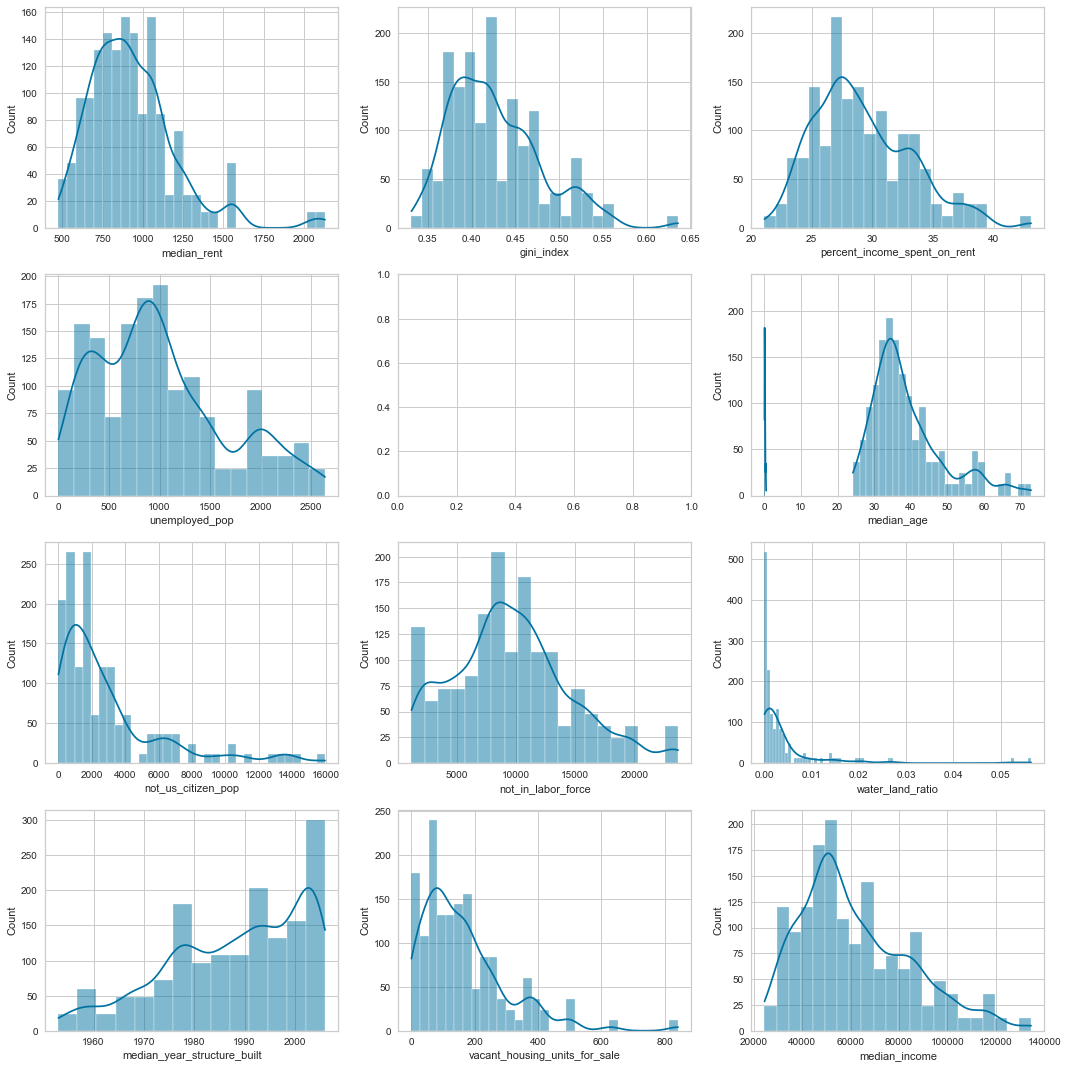

In [328]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_rent", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "percent_income_spent_on_rent", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "poverty_rate", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "not_us_citizen_pop", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "not_in_labor_force", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "median_year_structure_built", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

In [330]:
# from sklearn.preprocessing import PowerTransformer
   
# pt = PowerTransformer(method = 'yeo-johnson')
# for feature in list(features.select_dtypes(include = ['int64', 'float64'])):
#     features[feature] = pt.fit_transform(features[feature].to_numpy().reshape(-1,1))
#     features[feature] = pt.transform(features[feature].to_numpy().reshape(-1,1))    

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: Runtime

In [335]:
features.head()

,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_54,female_1

### Label

In [336]:
label = df_model[(df_model['year'].isin(['2019']))][['zri']]
label.head()

,zri
13100,1367.0
13101,1368.0
13102,1332.0
13103,1356.0
13104,NaN


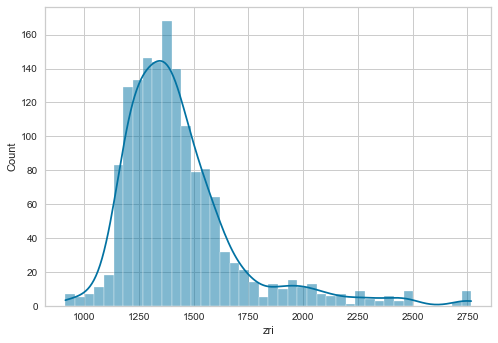

In [337]:
sns.histplot( x= "zri", data=label, kde = True);


In [338]:
label_trans = np.log(label)
label_trans.head()

,zri
13100,7.220374
13101,7.221105
13102,7.194437
13103,7.212294
13104,NaN


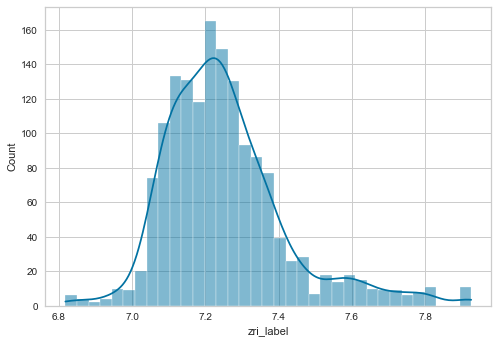

In [339]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [340]:
label_trans.shape[0]

1572

In [341]:
features.shape[0]

1572

In [342]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

In [343]:
features = features.reset_index(drop = True)

In [344]:
label_trans = label_trans.reset_index(drop = True)

In [345]:
lab_and_features = pd.concat([label_trans,features], axis = 1)

In [346]:
lab_and_features.head(5)

,zri_label,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_5

Drop all the rows that don't have a value for the 2018-2020 zri label

In [347]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

1546

In [348]:
print_missingness(lab_and_features)

The number of observations is 1546
The number of variables is 233
    
The total number of missing values is 2611
The number of rows with missing values is 70
The number of features with missing values is 233
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                2
female_25_to_29                                                   11
pop_16_over                                                       11
female_40_to_44                                                   11
high_school_diploma                                               11
male_pop                                                          11
female_55_to_59                                                   11
female_70_to_74                                                   11
female_pop                                                        11
in_grades_9_to_12                                                 11
rent_over_50_percent                             

## Benchmark model
### Predicting zri with historical zri values

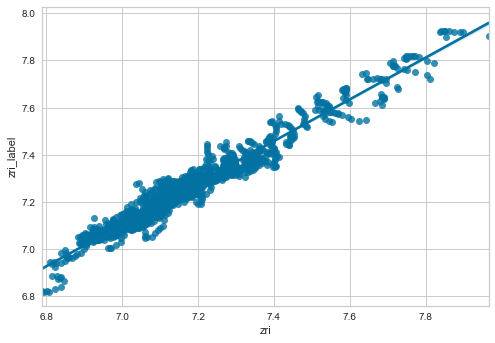

In [349]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [350]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [352]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.9409951556568537
Linear regression testing score: 0.9583963955601843
Linear regression RMSE: 0.0360527807147845


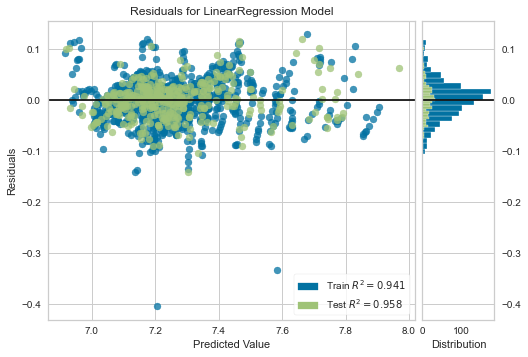

In [354]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [355]:
zri_pred_imputed = Xbase.copy()
zri_pred_imputed = zri_pred_imputed.fillna(method = 'ffill')

In [356]:
predictions = base_ols.predict(zri_pred_imputed) #gives an array
#predictions = [x for x in predictions] #convert to list
predictions

array([7.24036868, 7.24246405, 7.21985604, ..., 7.66831835, 7.08412038,
       7.03621819])

In [357]:
residuals = y - predictions
residuals[:5]

0   -0.019995
1   -0.021359
2   -0.025419
3   -0.013267
5   -0.036110
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [359]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri_label,zri,year,month,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_5

#### Residuals EDA

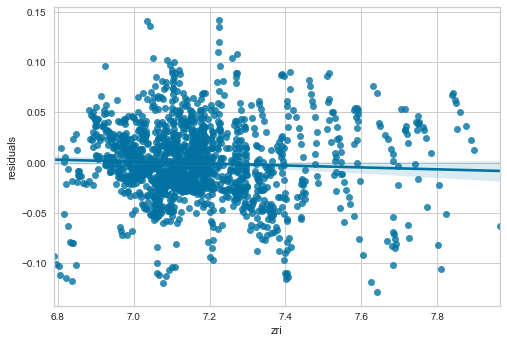

In [360]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

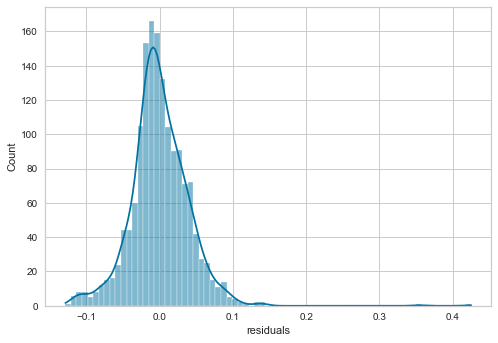

In [361]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

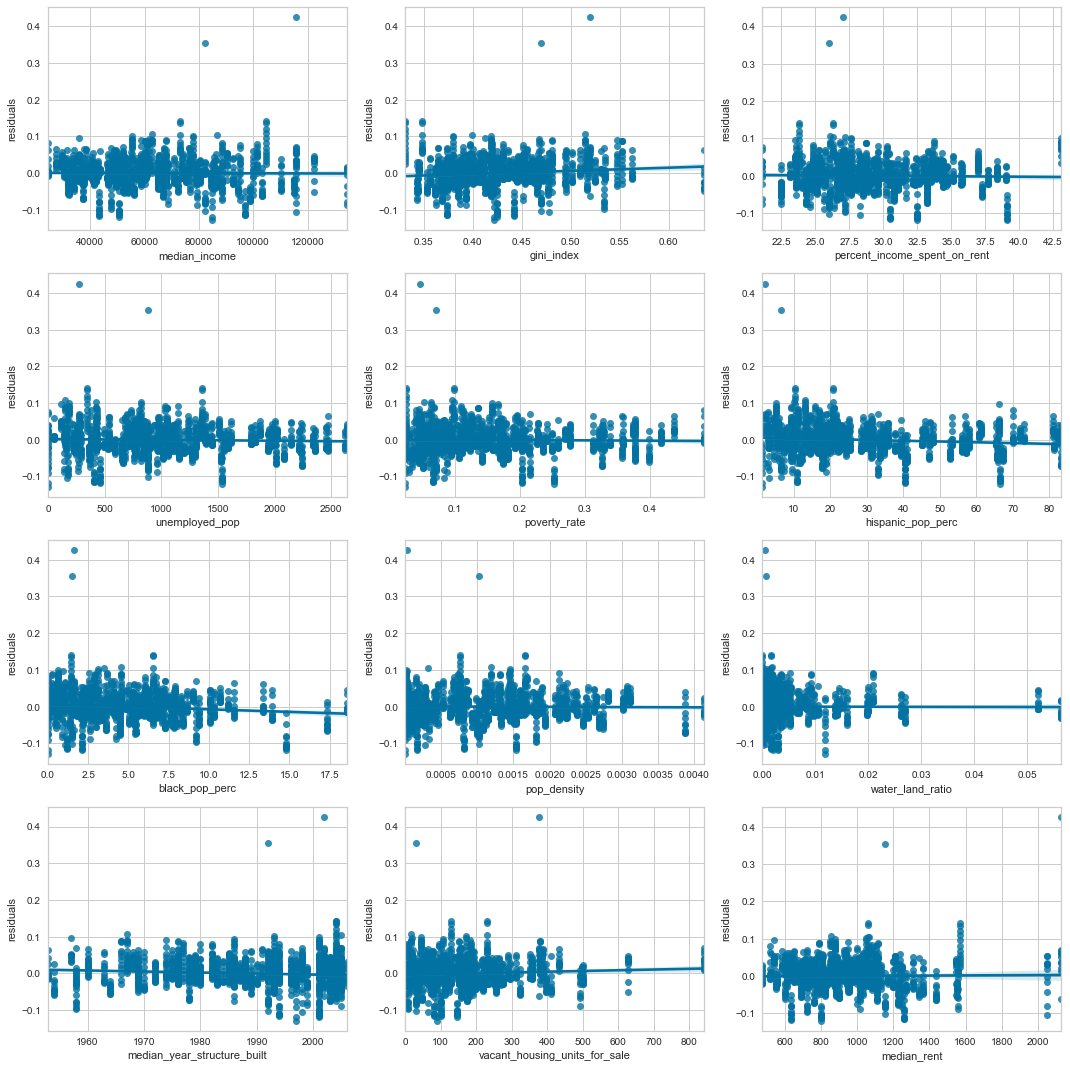

In [362]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "percent_income_spent_on_rent", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "poverty_rate", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "hispanic_pop_perc", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "black_pop_perc", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "pop_density", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "median_year_structure_built", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "median_rent", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

The residuals don't have an obvious linear relationship with any of the predictors. So I'll try a tree model

### Modeling the residuals

In [363]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, KFold

In [364]:
print_missingness(lab_and_features)

The number of observations is 1546
The number of variables is 234
    
The total number of missing values is 2611
The number of rows with missing values is 70
The number of features with missing values is 234
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                2
female_25_to_29                                                   11
pop_16_over                                                       11
female_40_to_44                                                   11
high_school_diploma                                               11
male_pop                                                          11
female_55_to_59                                                   11
female_70_to_74                                                   11
female_pop                                                        11
in_grades_9_to_12                                                 11
rent_over_50_percent                             

In [365]:
lab_and_features.dropna(inplace = True)

In [373]:
Xrfr = lab_and_features.drop(columns = ['residuals','zri', 'zri_label', 'year', 'month'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(1476, 229)
1476


In [374]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [313]:
# Xtrain_imp =  Xtrain.fillna(method = 'ffill')

# Xtest_imp = Xtest.fillna(method = 'ffill')

In [375]:
Xtrain.sample(5)

,commute_less_10_mins,male_45_64_associates_degree,female_under_5,vacant_housing_units_for_sale,high_school_including_ged,female_75_to_79,in_grades_1_to_4,asian_male_55_64,female_65_to_66,rent_10_to_15_percent,employed_information,female_5_to_9,male_67_to_69,sales_office_employed,children_in_single_female_hh,million_dollar_housing_units,female_85_and_over,geo_id,median_age,gini_index,owner_occupied_housing_units_upper_value_quartile,worked_at_home,dwellings_2_units,male_65_to_66,male_25_to_29,female_21,renter_occupied_housing_units_paying_cash_median_gross_rent,male_70_to_74,commuters_16_over,group_quarters,employed_public_administration,employed_other_services_not_public_admin,commuters_by_car_truck_van,households_public_asst_or_food_stamps,median_rent,other_race_pop,income_150000_199999,not_us_citizen_pop,employed_retail_trade,walked_to_work,income_30000_34999,in_school,occupation_natural_resources_construction_maintenance,vacant_housing_units_for_rent,male_45_to_49,two_cars,income_125000_149999,armed_forces,median_year_structure_built,male_20,male_45_to_64,commuters_by_carpool,four_more_cars,amerindian_pop,associates_degree,rent_under_10_percent,income_40000_44999,housing_built_1939_or_earlier,female_18_to_19,income_60000_74999,aggregate_travel_time_to_work,male_10_to_14,mobile_homes,male_male_households,female_30_to_34,housing_built_2000_to_2004,two_parents_not_in_labor_force_families_with_young_children,male_45_64_grade_9_12,employed_wholesale_trade,income_50000_59999,employed_arts_entertainment_recreation_accommodation_food,income_25000_29999,female_62_to_64,rent_35_to_40_percent,male_15_to_17,commute_15_19_mins,occupation_services,two_or_more_races_pop,hispanic_male_45_54,income_15000_19999,asian_male_45_54,pop_25_years_over,commuters_by_subway_or_elevated,female_20,income_100000_124999,male_22_to_24,male_under_5,female_67_to_69,hispanic_male_55_64,income_35000_39999,less_one_year_college,owner_occupied_housing_units_lower_value_quartile,some_college_and_associates_degree,male_45_64_less_than_9_grade,housing_built_2005_or_later,different_house_year_ago_same_city,two_parent_families_with_young_children,masters_degree,rent_20_to_25_percent,percent_income_spent_on_rent,female_35_to_39,commute_25_29_mins,graduate_professional_degree,male_45_64_bachelors_degree,employed_finance_insurance_real_estate,income_75000_99999,female_10_to_14,male_5_to_9,commute_60_more_mins,occupation_sales_office,female_60_to_61,income_less_10000,population_1_year_and_over,bachelors_degree,one_year_more_college,male_18_to_19,not_in_labor_force,income_45000_49999,owner_occupied_housing_units_median_value,employed_agriculture_forestry_fishing_hunting_mining,no_car,white_pop,commute_35_44_mins,dwellings_1_units_attached,female_22_to_24,management_business_sci_arts_employed,three_cars,less_than_high_school_graduate,income_200000_or_more,unemployed_pop,employed_education_health_social,income_20000_24999,white_male_55_64,dwellings_3_to_4_units,male_50_to_54,pop_in_labor_force,male_85_and_over,male_80_to_84,married_households,female_80_to_84,commuters_drove_alone,occupation_production_transportation_material,employed_science_management_admin_waste,no_cars,male_21,female_25_to_29,pop_16_over,female_40_to_44,high_school_diploma,male_pop,female_55_to_59,female_70_to_74,female_pop,in_grades_9_to_12,rent_over_50_percent,income_10000_14999,housing_units_renter_occupied,different_house_year_ago_different_city,civilian_labor_force,employed_transportation_warehousing_utilities,in_undergrad_college,asian_pop,rent_burden_not_computed,commuters_by_public_transportation,male_35_to_39,black_male_55_64,median_income,nonfamily_households,one_parent_families_with_young_children,rent_30_to_35_percent,dwellings_1_units_detached,black_male_45_54,mortgaged_housing_units,employed_manufacturing,owner_occupied_housing_units,commute_20_24_mins,female_female_households,father_one_parent_families_with_young_children,do_date,commute_10_14_mins,female_50_to_54,female_15_to_17,father_

In [376]:
print(np.all(np.isfinite(Xtrain_imp)))
print(np.all(np.isfinite(Xtest_imp)))
print(np.all(np.isfinite(ytrain)))
print(np.all(np.isfinite(ytest)))

print(np.any(np.isnan(Xtrain_imp)))
print(np.any(np.isnan(Xtest_imp)))
print(np.any(np.isnan(ytrain)))
print(np.any(np.isnan(ytest)))

True
True
True
True
False
False
False
False


In [377]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.6105252629059285
RF regression testing score: 0.4953488439164405


In [379]:
#parameters grid
params = {'ccp_alpha':[0,0.0001], #lets decrease the size of each tree
         'n_estimators': [100, 200, 300],
         'min_samples_leaf':[5, 10, 20]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.0001],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [380]:
grid.best_params_

{'ccp_alpha': 0, 'min_samples_leaf': 5, 'n_estimators': 300}

In [382]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.6083151389091214
RF best regression testing score: 0.4815823861724903


In [383]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain_imp.columns)
feat_imp.sort_values(ascending = False)

male_70_to_74                                                     0.056107
not_us_citizen_pop                                                0.034748
asian_male_55_64                                                  0.029743
two_parents_mother_in_labor_force_families_with_young_children    0.018767
water_land_ratio                                                  0.018648
male_10_to_14                                                     0.017845
housing_built_2000_to_2004                                        0.016813
dwellings_5_to_9_units                                            0.016476
father_one_parent_families_with_young_children                    0.015584
mobile_homes                                                      0.015461
female_22_to_24                                                   0.015268
armed_forces                                                      0.014550
income_125000_149999                                              0.014358
income_30000_34999       

In [384]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [135]:
print(gbr.score(Xtrain_imp,ytrain))
print(gbr.score(Xtest_imp,ytest))

y_pred = gbr.predict(Xtest_imp)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.5306753984038719
0.3421246158778235
Gradient Boosting RMSE: 0.03388050837327726


In [385]:
paramsGB = {'loss': ['ls', 'huber'],
            'learning_rate':[.01,1,10], #lets decrease the size of each tree
            'n_estimators': [50, 100, 200],
            'max_depth':[3, 4]}

In [386]:
gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain, np.ravel(ytrain))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/si

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/py

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 1, 10],
                         'loss': ['ls', 'huber'], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [387]:
gridGB.best_params_

{'learning_rate': 1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 50}

In [389]:
best_gb = gridGB.best_estimator_
print(f'RF best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_gb.score(Xtest, ytest)}')

RF best regression training score: 0.6110856738483914
RF best regression testing score: 0.5007528440368363


The best gradient boosting model from the grid search is worse than the default one. It is definetly overfit. Keep the params

In [390]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain_imp.columns)
feat_impGB.sort_values(ascending = False)

male_70_to_74                                                     5.755083e-02
housing_built_2000_to_2004                                        5.221009e-02
asian_male_55_64                                                  4.228917e-02
female_40_to_44                                                   3.290457e-02
median_rent                                                       3.268475e-02
employed_manufacturing                                            3.135454e-02
hispanic_pop_perc                                                 2.749618e-02
male_10_to_14                                                     2.738034e-02
income_less_10000                                                 2.537210e-02
armed_forces                                                      2.324359e-02
rent_burden_not_computed                                          2.164012e-02
vacant_housing_units                                              2.009441e-02
mobile_homes                                        